# CS 663 - Machine Learning Spring, 2024
## Assignment 02 - KMeans

### Goals:
1. Develop your version of K-Means.
2. Compare performance of different implementations.
3. Demonstrate understanding of clustering algorithms like K-Means, DBSCAN, and Hierarchical.
4. Extend functionality of K-Means implementation through additional parameters.



## Problem 4 : Extend K-Means (optional)

* Change your implementation of K-Means in the first part to include an additional optional Boolean (True/False) argument, balanced. The default value must be False. When balanced is set to True, the implementation changes so that each of the k clusters are (roughly) equal with respect to the number of instances in the cluster hypotheses — i.e. the implementation generates clusters of (roughly) the same size. When balanced is set to False, the logic is the canonical K-Means, described in the Background section.


## Approach

1. We first import the generate_skewed_points dataset and perform EDA
2. Fit the model with my implementation of KMeans with balanced not set
3. Fit the model with my implementation of KMeans with balanced set to true
5. Reported comparisons


## References

- [Scikit-Learn Documentation: KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  
  Official documentation for the KMeans clustering algorithm in Scikit-Learn.

- [IEEE Xplore Article: SKLearn reference values](https://ieeexplore.ieee.org/document/9260048)  


In [1]:
import sys
sys.path.append("./modules")
from blob_data._blob_data import generate_skewed_points
from eda.eda import EDAAnalyzer
from kmeans._kmeans import KMeans as myKMeans
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from cluster_algo.kmeans.kmeans_clustering import KMeansClustering

In [2]:
blob_data = generate_skewed_points(n_samples=700)

#### EDA

In [3]:
eda_analyzer = EDAAnalyzer(blob_data)
eda_analyzer.display_head()

,x,y
0,0.068824,0.713495
1,0.030167,0.643862
2,1.420848,0.577342
3,0.335024,0.703235
4,0.105631,0.934516


In [4]:
eda_analyzer.display_shape()

'Shape of data: rows: 700 cols: 2'

In [5]:
eda_analyzer.describe()

,count,mean,std,min,25%,50%,75%,max
x,700.0,0.970325,0.933555,0.002466,0.295741,0.670842,1.371984,7.116498
y,700.0,0.500400,0.296685,0.003083,0.229789,0.508813,0.764820,0.997758


#### Univariate Analysis

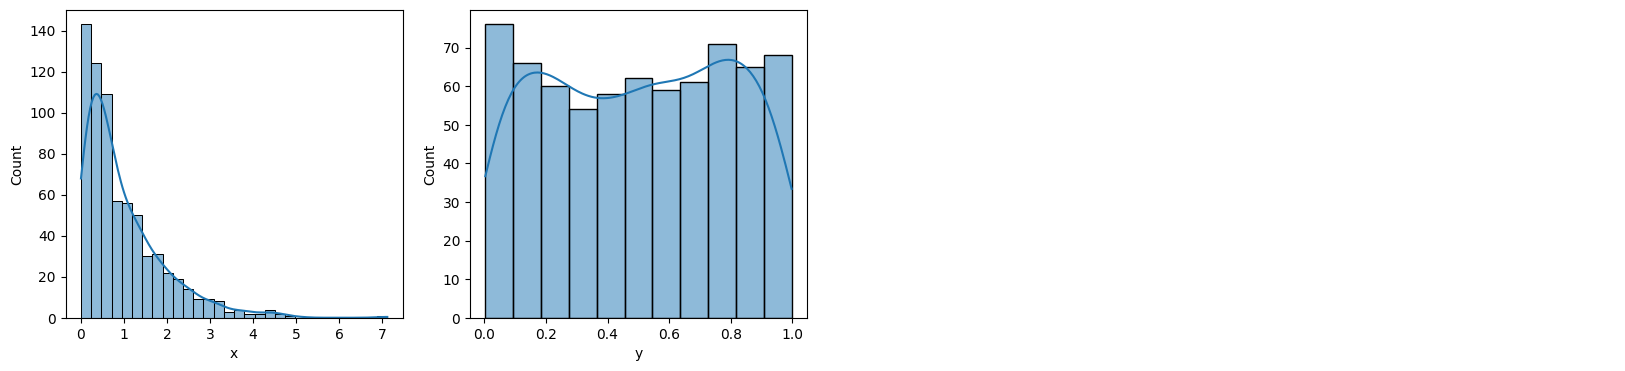

In [6]:
eda_analyzer.plot_histograms()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


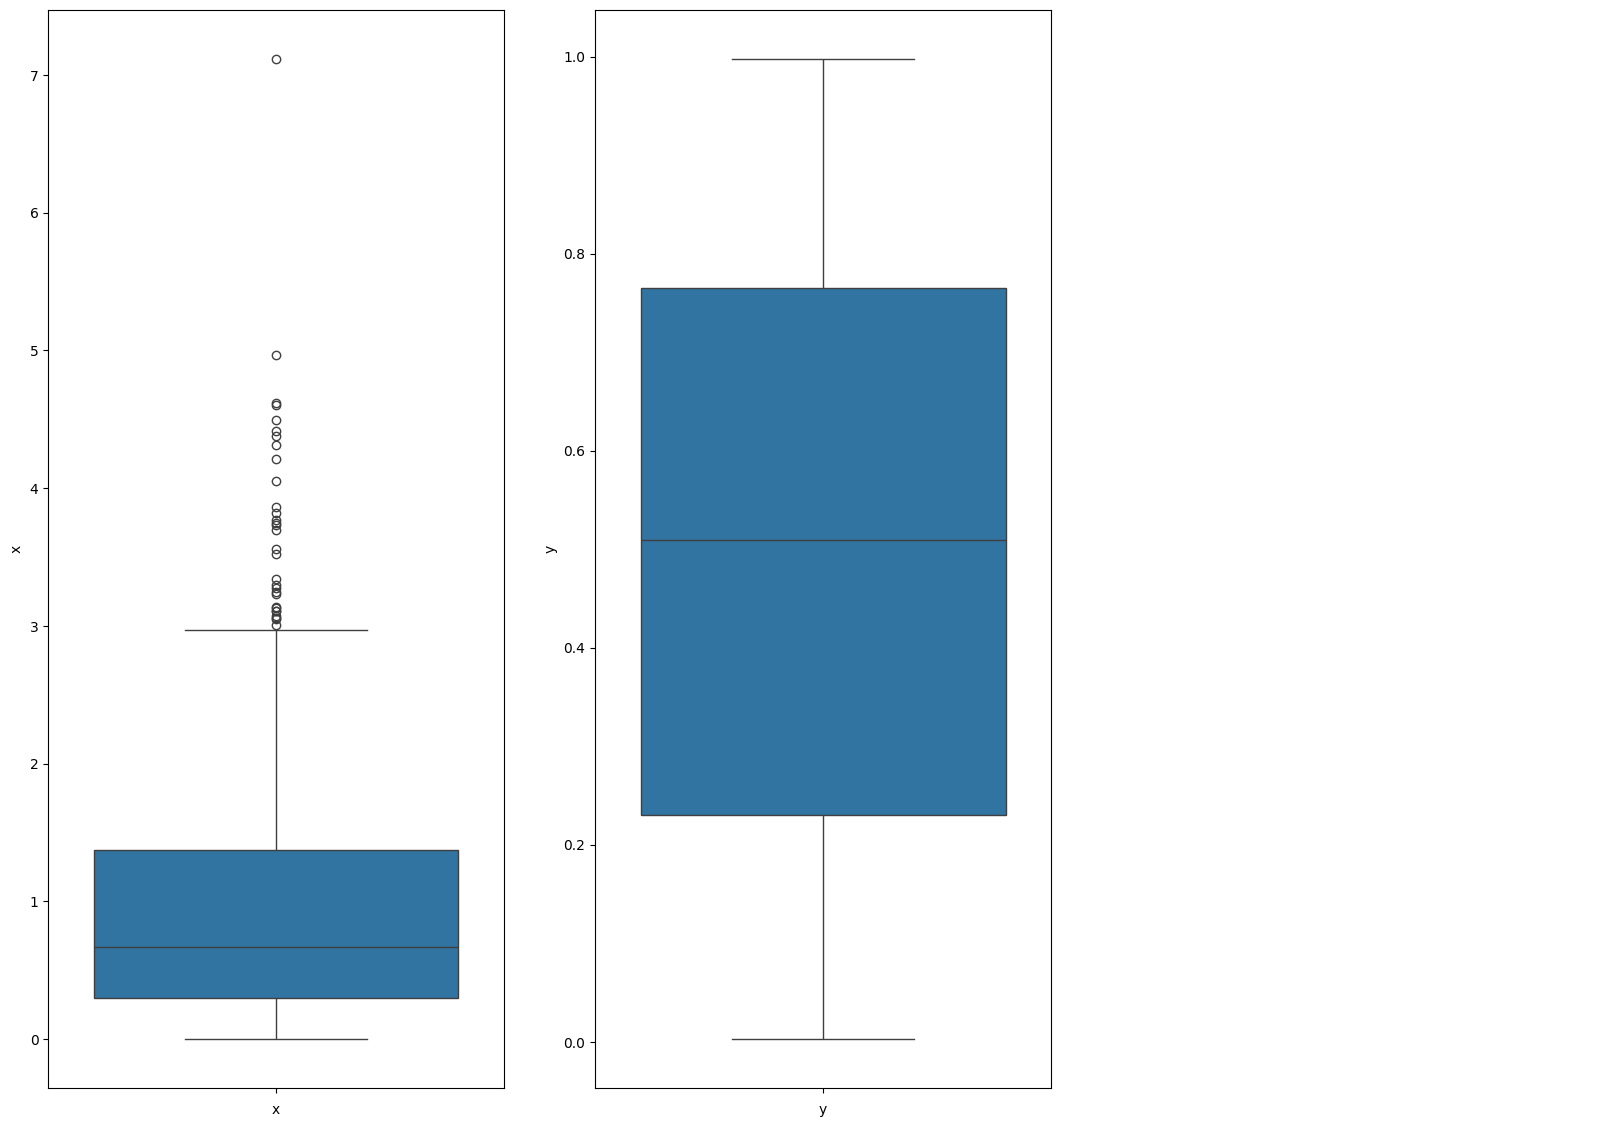

In [7]:
eda_analyzer.get_box_plot()

##### Bivariate Analysis

Number of rows: 1


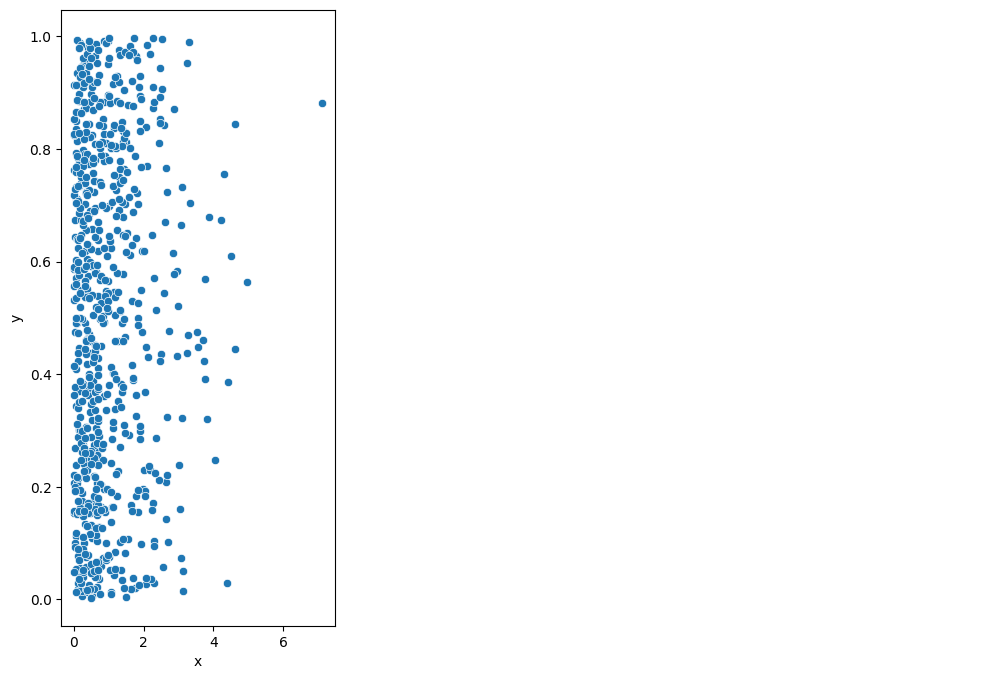

In [8]:
eda_analyzer.get_scatter_plot("y")

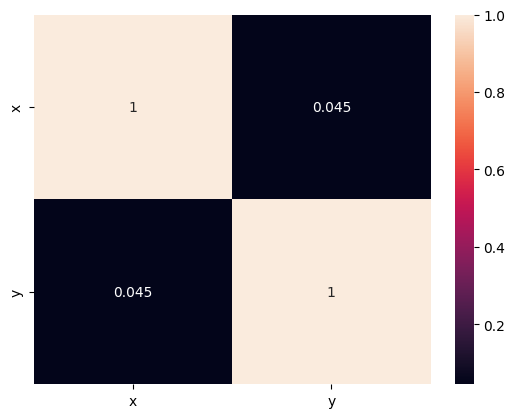

In [9]:
eda_analyzer.get_heat_map()

#### Data quality evaluvation : 

- **Number of Samples**: 700
- **Number of Centers**: 4
- **Data Structure**: Synthetic dataset with 700 samples distributed among 4 clusters.
- **Cluster Separation**: Each cluster has a distinct centroid with a standard deviation of 0.60, indicating some overlap between clusters.
- **Randomness**: Generated with a fixed random state of 0 for reproducibility.


#### Fit Data with my balance not set

* We aren't doing hyperparameter tuning as we only want to test the hypothesis at that pre decided values . Though its highly recommended

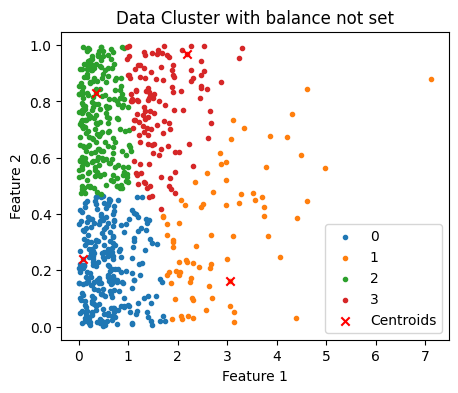

In [10]:
myKMeans = myKMeans(n_clusters=4, max_iter=300)
labels_myKMeans, cluster_centers_myKMeans = myKMeans.fit(blob_data)
myKMeans.plot(blob_data, labels_myKMeans, centroids=cluster_centers_myKMeans, title="Data Cluster with balance not set")

In [11]:
myKMeans.print_label_counts()

Label Counts:
Label 0: 264 instances
Label 1: 77 instances
Label 2: 231 instances
Label 3: 128 instances


#### Fit Data with my balance not set

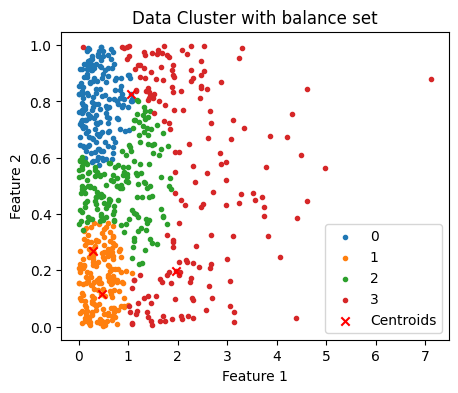

In [12]:
from kmeans._kmeans import KMeans as myKMeans
myKMeans = myKMeans(n_clusters=4, max_iter=300, balanced=True)
labels_myKMeans, cluster_centers_myKMeans = myKMeans.fit(blob_data)
myKMeans.plot(blob_data, labels_myKMeans, centroids=cluster_centers_myKMeans, title="Data Cluster with balance set")

In [13]:
cluster_centers_myKMeans

array([[1.04938433, 0.82629885],
       [0.46726262, 0.11584854],
       [1.97218438, 0.19570723],
       [0.29480028, 0.26950104]])

In [14]:
myKMeans.print_label_counts()

Label Counts:
Label 0: 175 instances
Label 1: 175 instances
Label 2: 175 instances
Label 3: 175 instances


#### Conclusion
 * As clearly evident in out two testing methods with balanced flag, we find in the later case its equally distributed.
 * This could have been done by assigning min one at a time, but the implemented model is about allocating even datapoints first and then moving to other clusters
